## Recruitment task solution -- NeuroSYS
### Author: Filip Marcinek

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

#### step 1

In [2]:
conn = sqlite3.connect('database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f'Tables names: {", ".join([t[0] for t in tables])}.')

Tables names: data, connection, additional_data.


In [3]:
data_df = pd.read_sql_query('SELECT * FROM data;', conn)
data_df.head(5)

,id,x,y,z,connection_id
0,1,44.628947,97.81099110033537,569.700453,105
1,2,40.764309,82.0486367746882,653.904064,76
2,3,25.849509,63.29510234435348,374.171176,72
3,4,18.973396,50.59596955801666,440.976635,239
4,5,44.787622,39.347747208411256,219.388963,152


In [4]:
connection_df = pd.read_sql_query('SELECT * FROM connection;', conn)
connection_df.head(5)

,id,name
0,2,blue
1,4,blue
2,9,blue
3,10,blue
4,15,blue


In [5]:
additional_data_df = pd.read_sql_query('SELECT * FROM additional_data;', conn)
additional_data_df

,color_id,color_name
0,0,red
1,2,blue
2,3,yellow
3,4,orange
4,5,black
5,11,green


In [6]:
cursor.close()
conn.close()

#### step 2

In [7]:
connection_df = connection_df.rename(columns={'id': 'connection_id', 'name': 'color_name'})
new_df = pd.merge(data_df, connection_df, on='connection_id')
new_df = pd.merge(new_df, additional_data_df, on='color_name')
new_df = new_df.drop(columns=['id', 'connection_id'])
new_df.head(5)

,x,y,z,color_name,color_id
0,44.628947,97.81099110033537,569.700453,green,11
1,50.463208,8.814924691205384,492.720476,green,11
2,88.087275,9.427093270234387,596.290924,green,11
3,6.417977,35.19214670661083,235.597430,green,11
4,72.278786,30.597382020856067,277.487142,green,11


#### step 3

In [8]:
new_df[['x', 'y', 'z']] = new_df[['x', 'y', 'z']].apply(pd.to_numeric, downcast='float', errors='coerce')
new_df['color_id'] = new_df['color_id'].apply(pd.to_numeric, downcast='integer', errors='coerce')
new_df.head(5)

,x,y,z,color_name,color_id
0,44.628948,97.810989,569.700439,green,11
1,50.463207,8.814924,492.720490,green,11
2,88.087273,9.427094,596.290894,green,11
3,6.417977,35.192146,235.597427,green,11
4,72.278786,30.597382,277.487152,green,11


#### step 4

In [9]:
new_df = new_df.dropna()
new_df.head(5)

,x,y,z,color_name,color_id
0,44.628948,97.810989,569.700439,green,11
1,50.463207,8.814924,492.720490,green,11
2,88.087273,9.427094,596.290894,green,11
3,6.417977,35.192146,235.597427,green,11
4,72.278786,30.597382,277.487152,green,11


#### step 5

In [10]:
new_df = new_df.rename(columns={'color_name': 'color'})
new_df.head(5)

,x,y,z,color,color_id
0,44.628948,97.810989,569.700439,green,11
1,50.463207,8.814924,492.720490,green,11
2,88.087273,9.427094,596.290894,green,11
3,6.417977,35.192146,235.597427,green,11
4,72.278786,30.597382,277.487152,green,11


#### step 6

In [11]:
list(new_df['color'].unique())

['green', 'orange', 'yellow', 'red', 'black', 'blue']

#### step 7

In [12]:
new_df = new_df[new_df['z'] == 100]
new_df.head(5)

,x,y,z,color,color_id
178,0.909091,0.034687,100.0,green,11
516,1.107071,0.016081,100.0,green,11
828,1.147475,0.089267,100.0,green,11
893,0.993939,0.004098,100.0,green,11
1045,0.961616,0.092195,100.0,green,11


#### step 8

In [13]:
red_points = new_df[new_df['color'] == 'red']
average_red_point = red_points[['x', 'y', 'z']].mean()
sigma = red_points[['x', 'y', 'z']].std()
sigma_distance = np.linalg.norm(sigma)

def filter_func(row):
    return np.linalg.norm((row['x'], row['y'], row['z']) - average_red_point) <= sigma_distance

red_points = red_points[red_points.apply(filter_func, axis=1)]
new_df = new_df[new_df['color'] != 'red'].append(red_points)
new_df.head(5)

,x,y,z,color,color_id
178,0.909091,0.034687,100.0,green,11
516,1.107071,0.016081,100.0,green,11
828,1.147475,0.089267,100.0,green,11
893,0.993939,0.004098,100.0,green,11
1045,0.961616,0.092195,100.0,green,11


#### step 9

In [14]:
new_df = new_df.reset_index(drop=True)
new_df.head(5)

,x,y,z,color,color_id
0,0.909091,0.034687,100.0,green,11
1,1.107071,0.016081,100.0,green,11
2,1.147475,0.089267,100.0,green,11
3,0.993939,0.004098,100.0,green,11
4,0.961616,0.092195,100.0,green,11


#### step 10

In [15]:
new_df[['x', 'y', 'color']].to_hdf('data.h5', key='ns1', mode='w')

#### step 11

In [16]:
df = pd.read_hdf('data.h5')
df.head(5)

,x,y,color
0,0.909091,0.034687,green
1,1.107071,0.016081,green
2,1.147475,0.089267,green
3,0.993939,0.004098,green
4,0.961616,0.092195,green


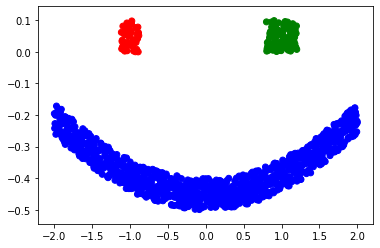

In [17]:
plt.scatter(df['x'], df['y'], color=df['color']);
plt.savefig('output.png')